In [232]:
import pandas as pd
import json
import requests
from scipy import special
from urllib.parse import quote
%matplotlib inline 

# Get crime data 
soql = "https://data.cityofchicago.org/resource/6zsd-86xi.json?$query="
soql += quote("SELECT community_area AS Community, count(*)/5 AS No_Crimes ")
soql += quote("WHERE 2007 < year AND year < 2013 ")
soql += quote("GROUP BY Community LIMIT 10000")

resp = requests.get(soql).json()

crime_total = pd.DataFrame(resp)

# Get rid of the redundant decimal places 
crime_total.No_Crimes = crime_total.No_Crimes.astype(float)
crime_total.round(1) 

#ATTENTION HERE: problem with NaN remains unsolved!!!!
crime_total.dropna(axis = 0, how = "any", inplace = True)   
# crime_total.head() 


In [201]:
# Get socioeconomics data 
socioeconomics = pd.read_csv("data/Census_Data_-_Selected_socioeconomic_indicators_in_Chicago__2008___2012.csv", index_col = ['Community Area Number']) 

# Merge crime data on socioeconomics data using Communty Area Number 
crime_total.rename(columns={'Community':'Community Area Number'}, inplace = True)
crime_total.set_index('Community Area Number')

mix_total = pd.DataFrame.join(crime_total, socioeconomics)
mix_total.dropna(axis = 0, how = "any", inplace = True)  
# mix_total

In [205]:
# create a logit-processed dataframe
mix_total_logit = mix_total.copy()
mix_total_logit['PERCENT OF HOUSING CROWDED'] = scipy.special.logit(mix_total_logit['PERCENT OF HOUSING CROWDED']/100)
mix_total_logit['PERCENT HOUSEHOLDS BELOW POVERTY'] = scipy.special.logit(mix_total_logit['PERCENT HOUSEHOLDS BELOW POVERTY']/100)
mix_total_logit['PERCENT AGED 16+ UNEMPLOYED'] = scipy.special.logit(mix_total_logit['PERCENT AGED 16+ UNEMPLOYED']/100)
mix_total_logit['PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA'] = scipy.special.logit(mix_total_logit['PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA']/100)
mix_total_logit['PERCENT AGED UNDER 18 OR OVER 64'] = scipy.special.logit(mix_total_logit['PERCENT AGED UNDER 18 OR OVER 64']/100)

In [206]:
# mix_total_logit

In [207]:
# Getting into the regression

%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("whitegrid", rc={'axes.linewidth': 2.5})
sns.set_context('notebook', font_scale=1.45, rc={"lines.linewidth": 3, "figure.figsize" : (7, 3)})

import pytz

from urllib.parse import quote

from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.regression.mixed_linear_model as sm_mlm

In [208]:
# # First look at the effect of hardship index on crime rate 

# crime_hardship = mix_total[['HARDSHIP INDEX','Crime_Rate']] 
# crime_hardship.head() 

In [297]:
socio_list = ['PERCENT OF HOUSING CROWDED',
 'PERCENT HOUSEHOLDS BELOW POVERTY',
 'PERCENT AGED 16+ UNEMPLOYED',
 'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
 'PERCENT AGED UNDER 18 OR OVER 64',
 'PER CAPITA INCOME ',
#  'HARDSHIP INDEX'
             ]

In [216]:
ax_name_logit = ['output/ax_Crowd_logit', 'output/ax_Poverty_logit', 
                 'output/ax_Unemp_logit', 'output/ax_Edu_logit', 
                 'output/ax_Age_logit', 'output/ax_Income_logit', 
                 'output/ax_Hardship_logit']
ax_name = ['output/ax_Crowd', 'output/ax_Poverty', 
           'output/ax_Unemp', 'output/ax_Edu', 
           'output/ax_Age', 'output/ax_Income', 
           'output/ax_Hardship']

In [265]:
# # orginal plots
# counter = 0
# for entry in socio_list:
#     ax = plt.figure()
#     sns.regplot(x = entry, y = 'No_Crimes', data = mix_total, scatter_kws = {"alpha" : 0.6})
# #     ax.savefig('{}.png'.format(ax_name[counter]), bbox_inches='tight', pad_inches=0.2)
#     ax.set_ylabel("john")
#     counter += 1

In [266]:
import matplotlib.pyplot as plt
import numpy as np

In [267]:
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

In [276]:
ax1.plot(x, y)


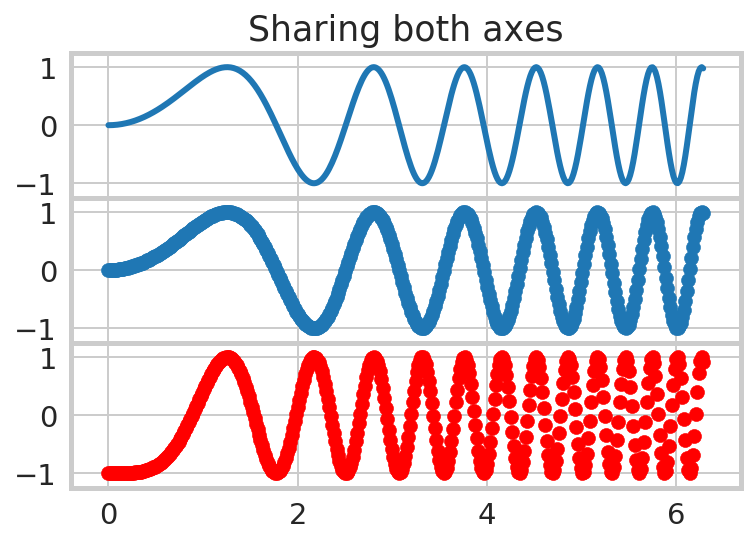

In [268]:
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing both axes')
ax2.scatter(x, y)
ax3.scatter(x, 2 * y ** 2 - 1, color='r')
# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)

In [310]:
plots_6 = ['a', 'b', 'c, d, e, f]
plots_6

['a', 'b', 'c', 'd', 'e', 'f']

ValueError: too many values to unpack (expected 2)

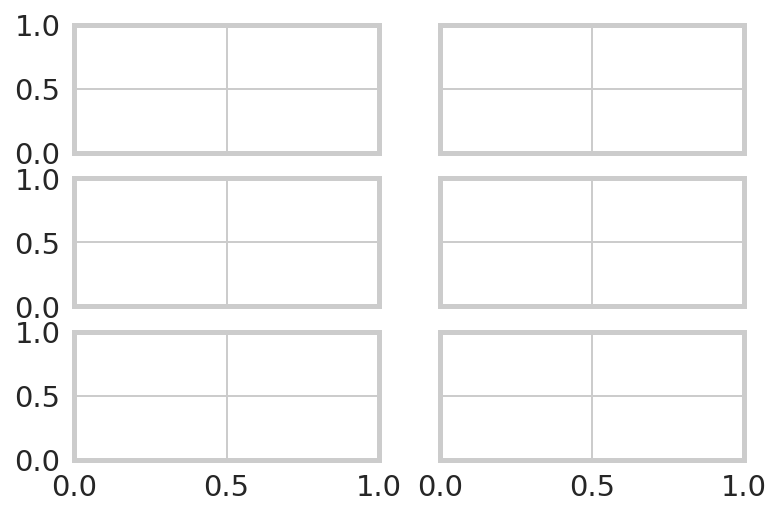

In [315]:
# create logit plots
counter = 0
f, ((a, b, c), (d, e, f)) = plt.subplots(3, 2, sharex = 'col', sharey = 'row')
# sns.regplot(x = 'PERCENT OF HOUSING CROWDED', y = 'No_Crimes', data = mix_total_logit, scatter_kws = {"alpha" : 0.6}, ax = ax1) 
# # ax_Crowd_logit.figure.savefig('ax_Crowd_logit.png', bbox_inches='tight', pad_inches=0.2)
# sns.regplot(x = 'PERCENT HOUSEHOLDS BELOW POVERTY', y = 'No_Crimes', data = mix_total_logit, scatter_kws = {"alpha" : 0.6}, ax = ax2) 
# sns.regplot(x = 'PERCENT AGED 16+ UNEMPLOYED', y = 'No_Crimes', data = mix_total_logit, scatter_kws = {"alpha" : 0.6}, ax = ax3)

for entry in socio_list:
    sns.regplot(x = entry, y = 'No_Crimes', data = mix_total_logit, scatter_kws = {"alpha" : 0.6}, ax = plots_6[counter])
#     ax.savefig('{}.png'.format(ax_name_logit[counter]), bbox_inches='tight', pad_inches=0.2)
    counter += 1



# for entry in socio_list:
#     ax1 = sns.regplot(x = entry, y = 'No_Crimes', data = mix_total_logit, scatter_kws = {"alpha" : 0.6})
# #     ax.savefig('{}.png'.format(ax_name_logit[counter]), bbox_inches='tight', pad_inches=0.2)
#     counter += 1


In [316]:
from matplotlib import pyplot as PLT

fig = PLT.figure()

In [317]:
ax1 = fig.add_subplot(211)
ax1.plot([(1, 2), (3, 4)], [(4, 3), (2, 3)])

ax2 = fig.add_subplot(212)
ax2.plot([(7, 2), (5, 3)], [(1, 6), (9, 5)])

PLT.show()

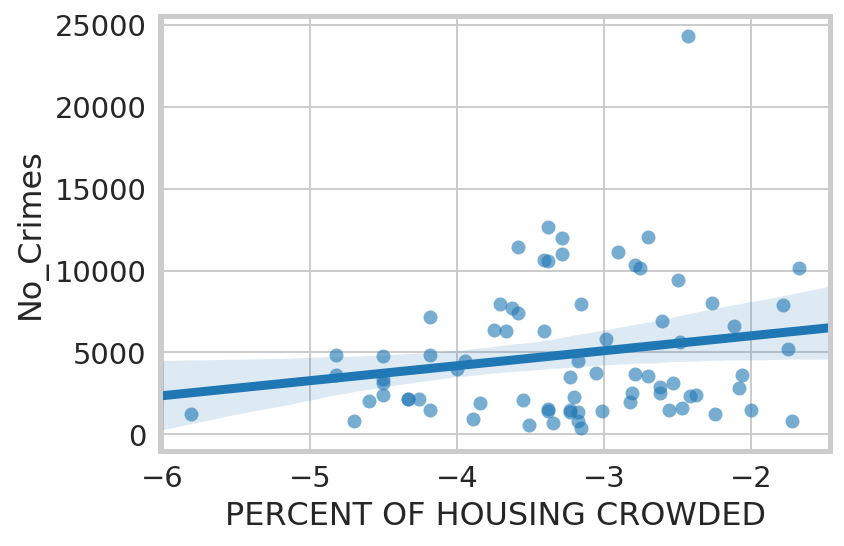

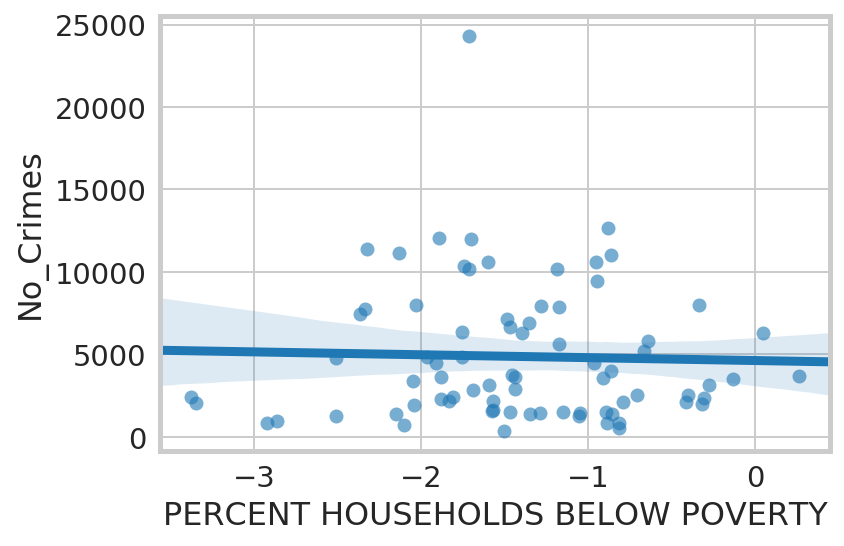

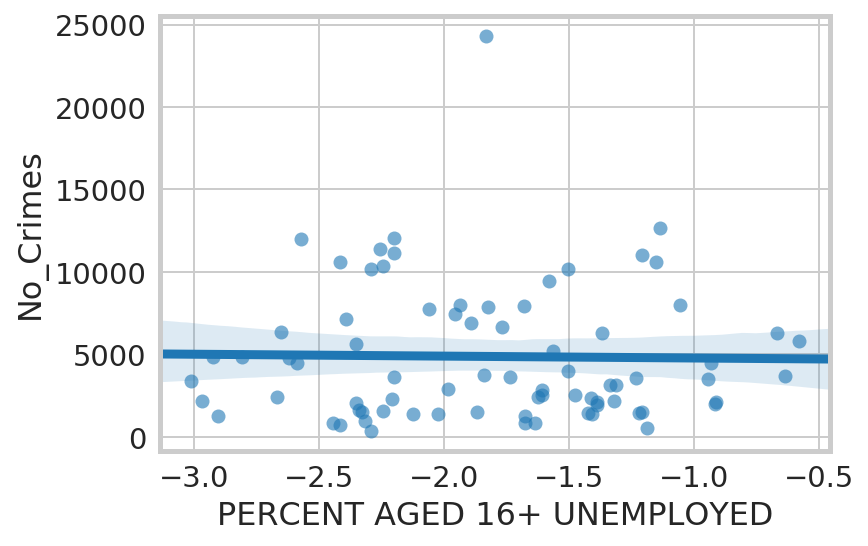

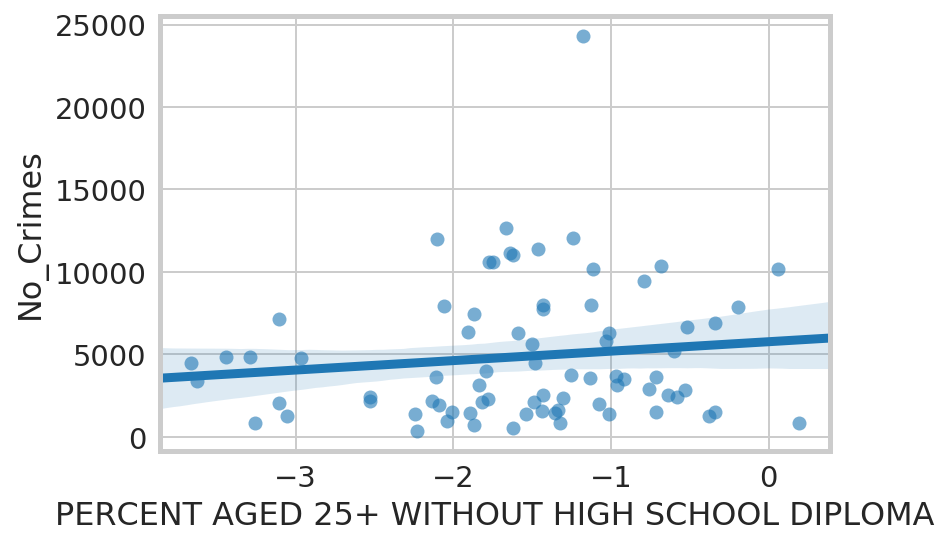

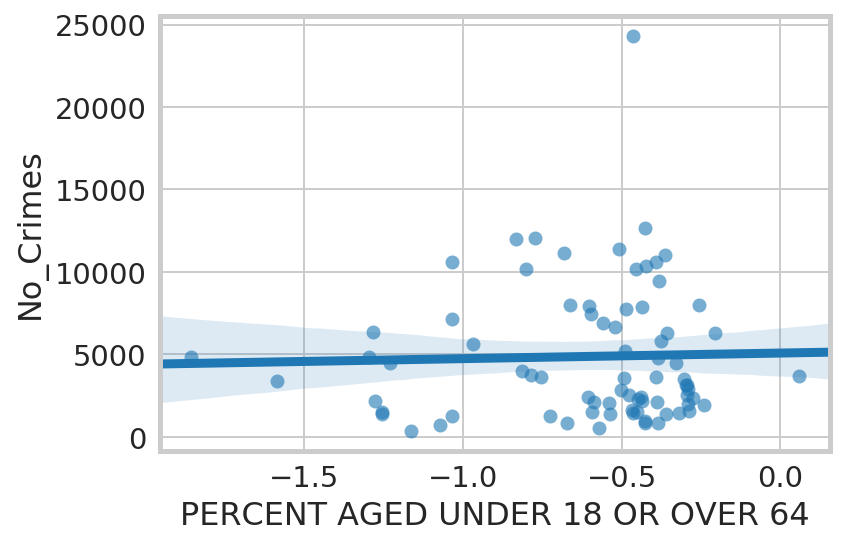

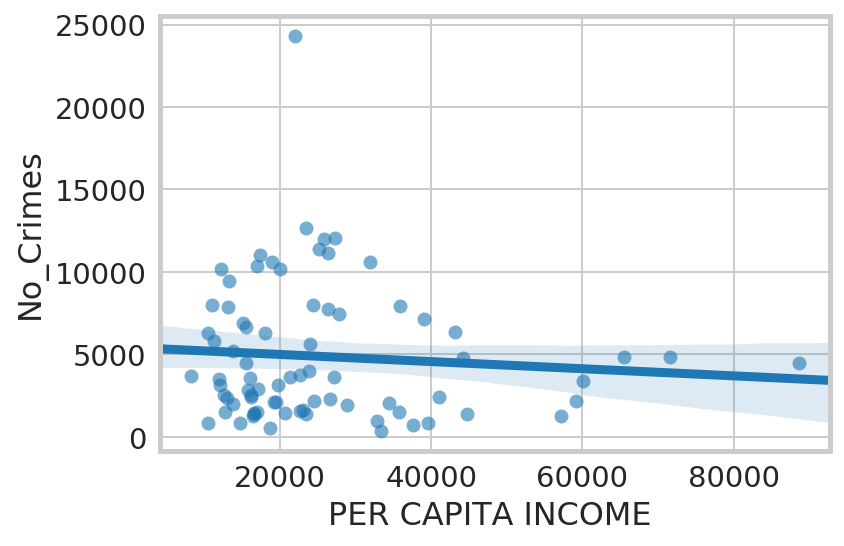

In [298]:
# create logit plots
counter = 0
for entry in socio_list:
    ax = plt.figure()
    sns.regplot(x = entry, y = 'No_Crimes', data = mix_total_logit, scatter_kws = {"alpha" : 0.6})
#     ax.savefig('{}.png'.format(ax_name_logit[counter]), bbox_inches='tight', pad_inches=0.2)
    counter += 1



In [219]:
# ax_Crowd_logit = sns.regplot(x = 'PERCENT OF HOUSING CROWDED', y = 'No_Crimes', data = mix_total_logit, scatter_kws = {"alpha" : 0.6}) 
# ax_Crowd_logit.figure.savefig('ax_Crowd_logit.png', bbox_inches='tight', pad_inches=0.2)
# ax_Poverty_logit = sns.regplot(x = 'PERCENT HOUSEHOLDS BELOW POVERTY', y = 'No_Crimes', data = mix_total_logit, scatter_kws = {"alpha" : 0.6}); 
# ax_Poverty_logit.figure.savefig('ax_Poverty_logit.png', bbox_inches='tight', pad_inches=0.2)
# ax_Unemp_logit = sns.regplot(x = 'PERCENT AGED 16+ UNEMPLOYED', y = 'No_Crimes', data = mix_total_logit, scatter_kws = {"alpha" : 0.6}); 
# ax_Unemp_logit.figure.savefig('ax_Unemp_logit.png', bbox_inches='tight', pad_inches=0.2)
# ax_PA25 = sns.regplot(x = 'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA', y = 'No_Crimes', data = mix_total_logit, scatter_kws = {"alpha" : 0.6}); 
# ax_PA25.figure.savefig('ax_PA25.png', bbox_inches='tight', pad_inches=0.2)
# ax_PA = sns.regplot(x = 'PERCENT AGED UNDER 18 OR OVER 64', y = 'No_Crimes', data = mix_total_logit, scatter_kws = {"alpha" : 0.6}); 
# ax_PA.figure.savefig('ax_PA.png', bbox_inches='tight', pad_inches=0.2)
# ax_PCI = sns.regplot(x = 'PER CAPITA INCOME ', y = 'No_Crimes', data = mix_total_logit, scatter_kws = {"alpha" : 0.6}); 
# ax_PCI.figure.savefig('ax_PCI.png', bbox_inches='tight', pad_inches=0.2)
# ax_HI = sns.regplot(x = 'HARDSHIP INDEX', y = 'No_Crimes', data = mix_total_logit, scatter_kws = {"alpha" : 0.6}); 
# ax_HI.figure.savefig('ax_HI.png', bbox_inches='tight', pad_inches=0.2)

In [220]:
# # Notice that there is a dot especially higher than all the others

# mix_total[mix_total.Crime_Rate >= 20000]  

# # So that outlier is Montclaire. 

In [221]:
# # ols_cr_hard = smf.ols(formula = "NC ~ H",
# #               data = crime_hardship.rename(columns = {"HARDSHIP INDEX":"H","No_Crimes":"NC"})) 
# # model_cr_hard = ols_cr_hard.fit()
# # model_cr_hard.summary() 

# result = smf.ols('NC ~ HI', 
#                  data = mix_total_logit.rename(columns = {'HARDSHIP INDEX':'HI', 'No_Crimes':'NC'})
#                 )
# result.fit().summary()

# # the coefficient for hardship index in not statistically significant 

In [222]:
### So generally speaking, since hardship index consists too much information about the socioeconomic status, it is not an ideal choice for us to explore the reason why different communities have different crime rates.

#### Next, we will turn into different aspects of socioeconomic indicators. 

In [239]:
ols = smf.ols(formula = "Crime ~ Crowd + Poverty + Unemp + Edu + Age + Income",
              data = mix_total_logit.rename(columns = {"No_Crimes"                            : "Crime", 
                                                 "PERCENT OF HOUSING CROWDED"                 : "Crowd", 
                                                 "PERCENT HOUSEHOLDS BELOW POVERTY"           : "Poverty", 
                                                 "PERCENT AGED 16+ UNEMPLOYED"                : "Unemp",
                                                 "PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA": "Edu",
                                                 "PERCENT AGED UNDER 18 OR OVER 64"           : "Age", 
                                                 "PER CAPITA INCOME "                         : "Income",
                                                 "HARDSHIP INDEX"                             : "Hardship"}))
model = ols.fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Crime   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.7487
Date:                Fri, 01 Dec 2017   Prob (F-statistic):              0.612
Time:                        10:55:51   Log-Likelihood:                -747.16
No. Observations:                  77   AIC:                             1508.
Df Residuals:                      70   BIC:                             1525.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8931.1397   3238.900      2.757      0.007    2471.357    1.54e+04
Crowd       1802.6252   1181.362      1.526      0.132    -553.527    4158.777
Poverty    -1055.2566   1202.685     -0.877      0.383   -3453.936    1343.423
Unemp        338.3121   1934.002      0.175      0.862   -3518.933    4195.557
Edu         -802.2854   1550.981     -0.517      0.607   -3895.620    2291.050
Age          -54.0370   2669.038     -0.020      0.984   -5377.266    5269.192
Income        -0.0141      0.087     -0.161      0.872      -0.188       0.160
==============================================================================
Omnibus:                       31.926   Durbin-Watson:                   1.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.346
Skew:                           1.443   Prob(JB):                     8.74e-16
Kurtosis:                       6.646   Cond. No.                     2.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

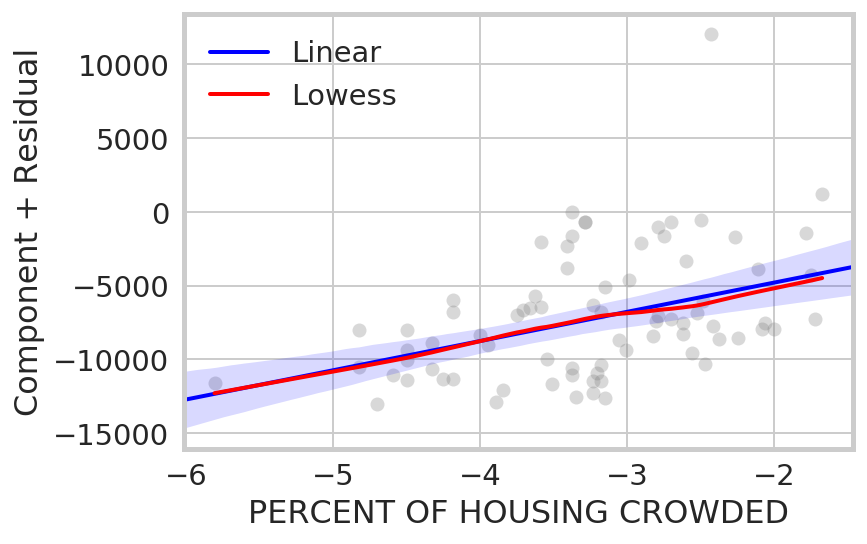

In [228]:
# logit 
chc = pd.Series(name = "Component + Residual", data = model.resid + mix_total_logit["PERCENT OF HOUSING CROWDED"] * model.
                params["Crowd"])
ax = sns.regplot(x = mix_total_logit["PERCENT OF HOUSING CROWDED"], y = chc, scatter = True, fit_reg = False,
            scatter_kws = {"alpha" : 0.3, "color" : "grey"})
sns.regplot(x = mix_total_logit["PERCENT OF HOUSING CROWDED"], y = chc, scatter = False, 
            lowess = False, robust = True, label = "Linear",
            scatter_kws = {"alpha" : 0.3, "color" : "grey"}, line_kws = {"color" : "blue", "linewidth" : 2})
sns.regplot(x = mix_total_logit["PERCENT OF HOUSING CROWDED"], y = chc, scatter = False, 
            lowess = True, label = "Lowess",
            scatter_kws = {"alpha" : 0}, line_kws = {"color" : "red", "linewidth" : 2}, ax = ax);

ax.legend()
ax.figure.savefig('output/housing_logit.png')

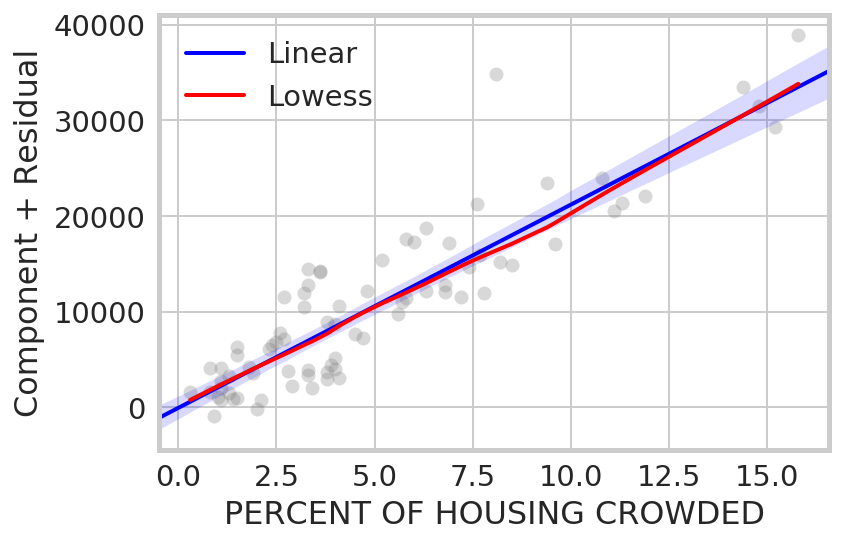

In [229]:
# regular
chc = pd.Series(name = "Component + Residual", data = model.resid + mix_total["PERCENT OF HOUSING CROWDED"] * model.
                params["Crowd"])
ax = sns.regplot(x = mix_total["PERCENT OF HOUSING CROWDED"], y = chc, scatter = True, fit_reg = False,
            scatter_kws = {"alpha" : 0.3, "color" : "grey"})
sns.regplot(x = mix_total["PERCENT OF HOUSING CROWDED"], y = chc, scatter = False, 
            lowess = False, robust = True, label = "Linear",
            scatter_kws = {"alpha" : 0.3, "color" : "grey"}, line_kws = {"color" : "blue", "linewidth" : 2})
sns.regplot(x = mix_total["PERCENT OF HOUSING CROWDED"], y = chc, scatter = False, 
            lowess = True, label = "Lowess",
            scatter_kws = {"alpha" : 0}, line_kws = {"color" : "red", "linewidth" : 2}, ax = ax);

ax.legend()
ax.figure.savefig('output/housing.png')

In [230]:
# mix_total_logit.columns

In [231]:
# result2 = smf.ols('NC ~ PHC + PHBP + PA16 + PA25 + PA + PCI + HI', 
#                  data = mix_total_logit.rename(columns = {'No_Crimes':'NC',
#                                                           'PERCENT OF HOUSING CROWDED':'PHC',
#                                                           'PERCENT HOUSEHOLDS BELOW POVERTY':'PHBP',
#                                                           'PERCENT AGED 16+ UNEMPLOYED':'PA16',
#                                                           'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA':'PA25',
#                                                           'PERCENT AGED UNDER 18 OR OVER 64':'PA',
#                                                           'PER CAPITA INCOME ':'PCI',
#                                                           'HARDSHIP INDEX':'HI'
#                                                           })
#                 )
# result2.fit().summary()